In [9]:
import os
import joblib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Article


In [10]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, "RAW", "result_generation")
num_arotor_configs = 6
arotor_classes = ["Healthy", 1, 2, 3, 4, 5, 6, 7, 8, 9]

sns.set_context("poster", font_scale=0.9)
plt.rcParams["svg.fonttype"] = "none"

Mean accuracy: 89.48972222222223
Mean accuracy 2: 89.48972222222221


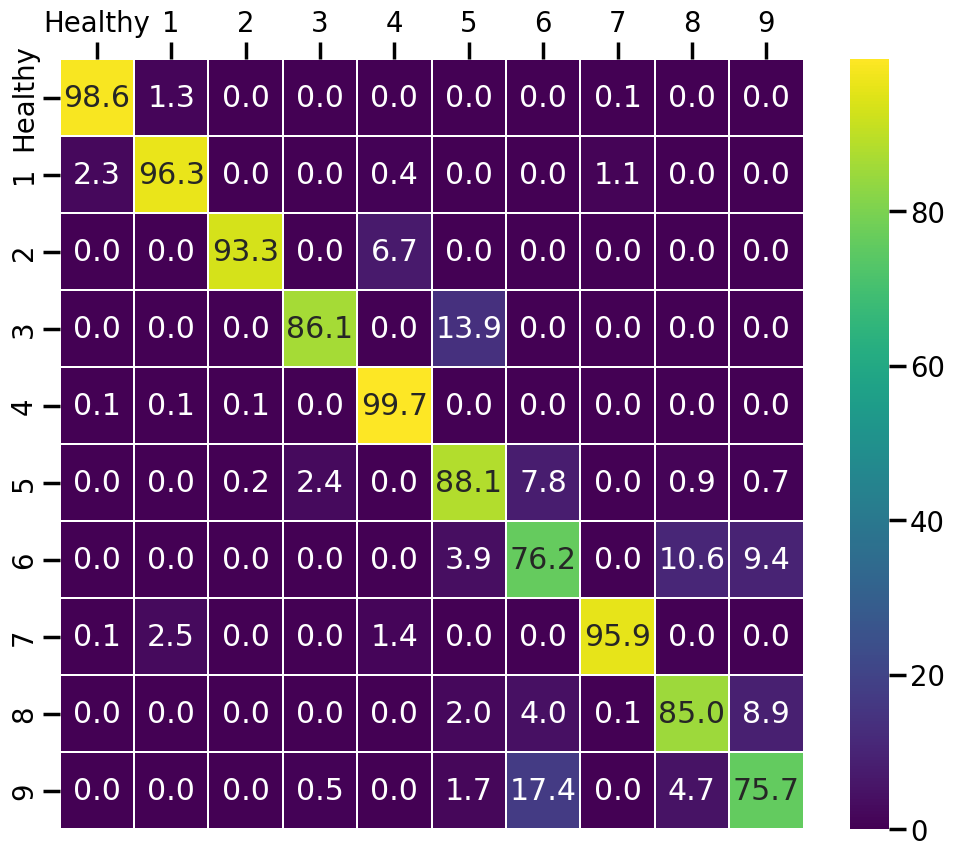

In [11]:
all_results = []
for i in range(num_arotor_configs):
    all_results.append(
        joblib.load(
            os.path.join(
                data_folder, "arotor_torque1_article_100", f"results_for_config_{i}.pkl"
            )
        )
    )

#! Do not use the "accuracy" from .pkl. It is the accuracy of the first non-ensemble model
all_diags = []
for r in all_results:
    all_diags.append(np.array([np.diag(x) / x[0].sum() for x in r["ensemble_cfs"]]))
print("Mean accuracy:", np.array(all_diags).mean(1).mean(0).mean() * 100)

all_cfs = []
for i in range(num_arotor_configs):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    cfs = cfs.sum(axis=0)
    cfs = cfs / cfs.sum(axis=1)
    all_cfs.append(cfs)
    # all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / len(arotor_classes)))

cf_agg = np.array(all_cfs).mean(axis=0) * 100
print("Mean accuracy 2:", np.diag(cf_agg).mean())

fig, ax = plt.subplots(figsize=(12, 10))
g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".1f",
    linewidth=0.3,
    xticklabels=arotor_classes,
    yticklabels=arotor_classes,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.savefig("images/C_ASD_T1_CF.svg")

Mean accuracy: 86.59444444444443
Mean accuracy 2: 86.59444444444445


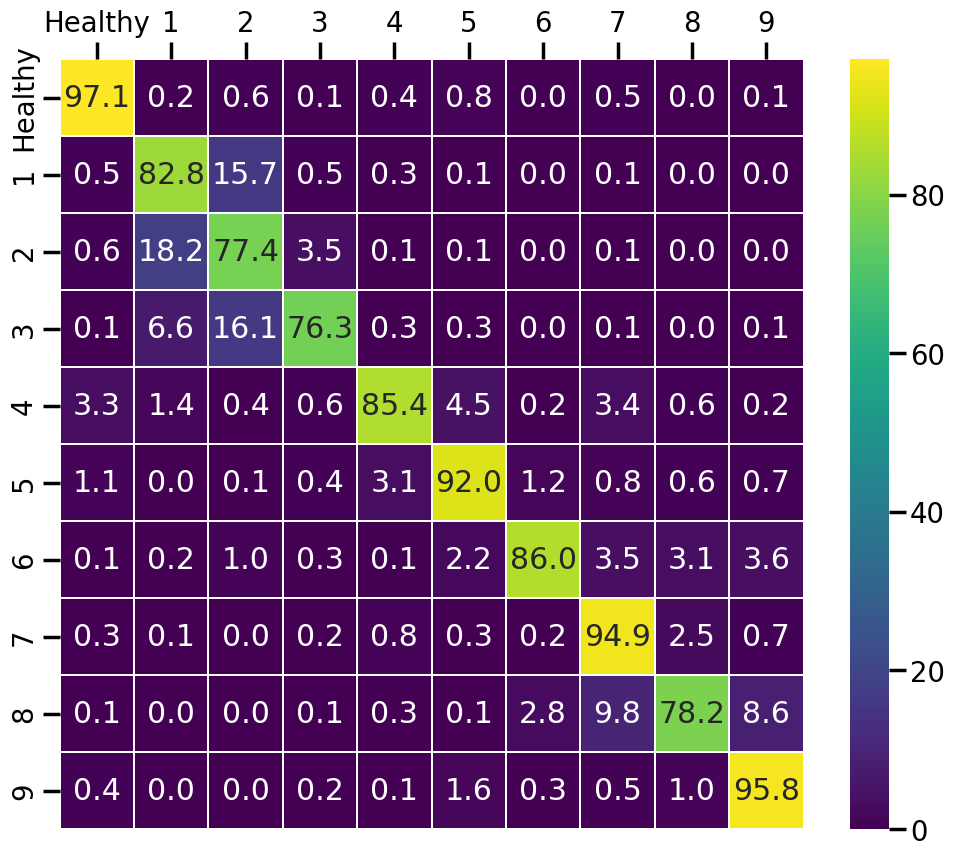

In [12]:
all_results = []
for i in range(num_arotor_configs):
    all_results.append(
        joblib.load(
            os.path.join(
                data_folder, "arotor_acc3_article_100", f"results_for_config_{i}.pkl"
            )
        )
    )

#! Do not use the "accuracy" from .pkl. It is the accuracy of the first non-ensemble model
all_diags = []
for r in all_results:
    all_diags.append(np.array([np.diag(x) / x[0].sum() for x in r["ensemble_cfs"]]))
print("Mean accuracy:", np.array(all_diags).mean(1).mean(0).mean() * 100)

all_cfs = []
for i in range(num_arotor_configs):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    cfs = cfs.sum(axis=0)
    cfs = cfs / cfs.sum(axis=1)
    all_cfs.append(cfs)
    # all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / len(arotor_classes)))

cf_agg = np.array(all_cfs).mean(axis=0) * 100
print("Mean accuracy 2:", np.diag(cf_agg).mean())

fig, ax = plt.subplots(figsize=(12, 10))
g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".1f",
    linewidth=0.3,
    xticklabels=arotor_classes,
    yticklabels=arotor_classes,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.savefig("images/C_ASD_A3_CF.svg")

---
---

---

# OLD


# New ARotor (robust)


In [7]:
data_folder = os.path.join(
    os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation"
)

all_results = []
for i in range(6):
    with open(
        os.path.join(data_folder, "arotor-robust", f"results_for_config_{i}.pkl"), "rb"
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.8946111111111111, 0.9446111111111111, 0.9982777777777778],
 'cfs': [array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1067,  733,    0,    0,    0,    0,    0,    0,    0],
         [   0,  765, 1034,    0,    0,    1,    0,    0,    0,    0],
         [   0,    0,    7, 1793,    0,    0,    0,    0,    0,    0],
         [   0,    0,   32,  174, 1594,    0,    0,    0,    0,    0],
         [   0,   10,   45,    1,    0, 1744,    0,    0,    0,    0],
         [   0,    0,    0,    0,    0,    0, 1698,    0,    0,  102],
         [   0,    0,    0,    0,    0,    0,    0, 1792,    8,    0],
         [   0,    0,    0,    0,    0,    0,    0,   19, 1781,    0],
         [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1800]]),
  array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1043,  757,    0,    0,    0,    0,    0,    0,    0],
         [   0,  224, 1576,    0,    0,    0,    0,    0,    0

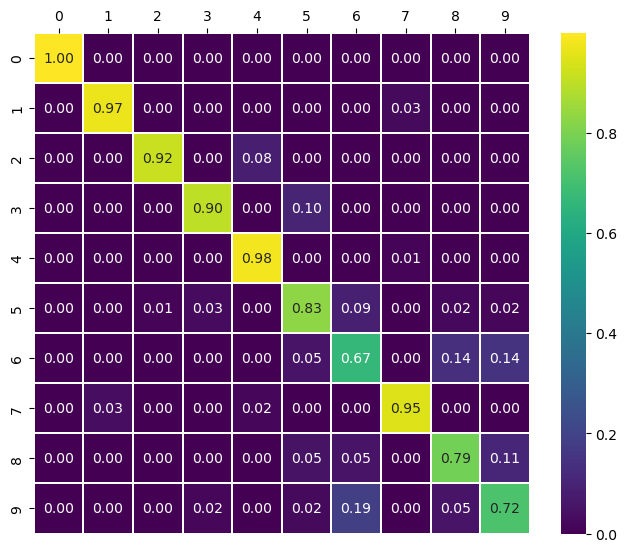

In [8]:
categories = list(range(10))

all_cfs = []
for i in range(6):  # Num configs
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 10))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(8, 6.5))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# New ARotor


In [2]:
data_folder = os.path.join(
    os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation"
)

all_results = []
for i in range(6):
    with open(
        os.path.join(data_folder, "arotor", f"results_for_config_{i}.pkl"), "rb"
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.9963333333333333, 0.9826666666666667, 0.9974444444444445],
 'cfs': [array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1739,   61,    0,    0,    0,    0,    0,    0,    0],
         [   0,    0, 1800,    0,    0,    0,    0,    0,    0,    0],
         [   0,    0,    0, 1800,    0,    0,    0,    0,    0,    0],
         [   0,    1,    0,    0, 1799,    0,    0,    0,    0,    0],
         [   0,    0,    0,    0,    0, 1800,    0,    0,    0,    0],
         [   0,    0,    0,    0,    0,    0, 1799,    0,    0,    1],
         [   0,    0,    0,    0,    0,    0,    0, 1797,    3,    0],
         [   0,    0,    0,    0,    0,    0,    0,    0, 1800,    0],
         [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1800]]),
  array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1799,    0,    0,    1,    0,    0,    0,    0,    0],
         [   0,    0, 1800,    0,    0,    0,    0,    0,    0

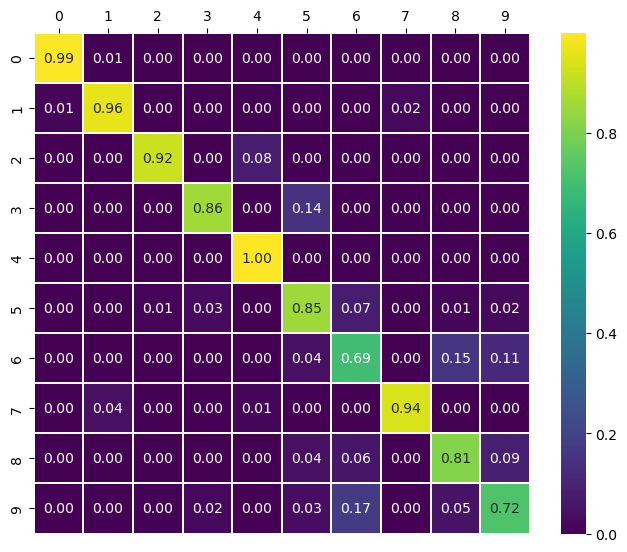

In [3]:
categories = list(range(10))

all_cfs = []
for i in range(6):  # Num configs
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 10))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(8, 6.5))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

## ARotor (same)


In [4]:
data_folder = os.path.join(
    os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation"
)

all_results = []
for i in range(6):
    with open(
        os.path.join(data_folder, "arotor-same", f"results_for_config_{i}.pkl"), "rb"
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.9905, 1.0, 0.9989444444444444],
 'cfs': [array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1799,    0,    0,    1,    0,    0,    0,    0,    0],
         [   0,    0, 1800,    0,    0,    0,    0,    0,    0,    0],
         [   0,    0,    0, 1800,    0,    0,    0,    0,    0,    0],
         [   0,    8,    0,    0, 1792,    0,    0,    0,    0,    0],
         [   0,    0,    0,  162,    0, 1638,    0,    0,    0,    0],
         [   0,    0,    0,    0,    0,    0, 1800,    0,    0,    0],
         [   0,    0,    0,    0,    0,    0,    0, 1800,    0,    0],
         [   0,    0,    0,    0,    0,    0,    0,    0, 1800,    0],
         [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1800]]),
  array([[1800,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0, 1800,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0,    0, 1800,    0,    0,    0,    0,    0,    0,    0],
         [   0,   

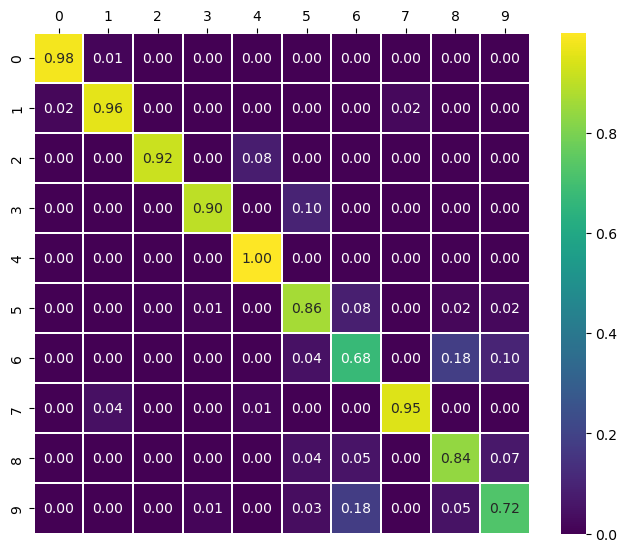

In [5]:
categories = list(range(10))

all_cfs = []
for i in range(6):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 10))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(8, 6.5))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")